In [1]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import saraRC1 as sara

In [2]:
im = cv2.imread('./images/3_colour.jpeg')


grid_size = 8
saliency_maps ={}
sara_heatmaps = {}
saliency_maps['itti'] = sara.return_saliency(im.copy(), generator='itti')
sara.reset()
saliency_maps['deepgaze'] = sara.return_saliency(im.copy(), generator='deepgaze')
sara.reset()
sara_heatmaps['sara_itti'] = sara.return_sara(im.copy(), grid_size, generator='itti')
sara.reset()
sara_heatmaps['sara_deepgaze'] = sara.return_sara(im.copy(), grid_size, generator='deepgaze')

# sm_itti = sara.return_saliency(im, generator='itti')
# sm_dg = sara.return_saliency(im, generator='deepgaze')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

Loaded pretrained weights for efficientnet-b5


Using cache found in C:\Users\User/.cache\torch\hub\pytorch_vision_v0.6.0
Using cache found in C:\Users\User/.cache\torch\hub\pytorch_vision_v0.6.0
c:\Users\User\Documents\Github\SaRa\benchmarking\saraRC1.py:111: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ..\torch\csrc\utils\tensor_new.cpp:201.)
  image_tensor = torch.tensor([image.transpose(2, 0, 1)]).to(DEVICE)


Loaded pretrained weights for efficientnet-b5


Using cache found in C:\Users\User/.cache\torch\hub\pytorch_vision_v0.6.0
Using cache found in C:\Users\User/.cache\torch\hub\pytorch_vision_v0.6.0
c:\Users\User\Documents\Github\SaRa\benchmarking\saraRC1.py:196: RuntimeWarning: overflow encountered in double_scalars
  entropy += entropy + (t_prob * math.log(2, (1 / t_prob)))


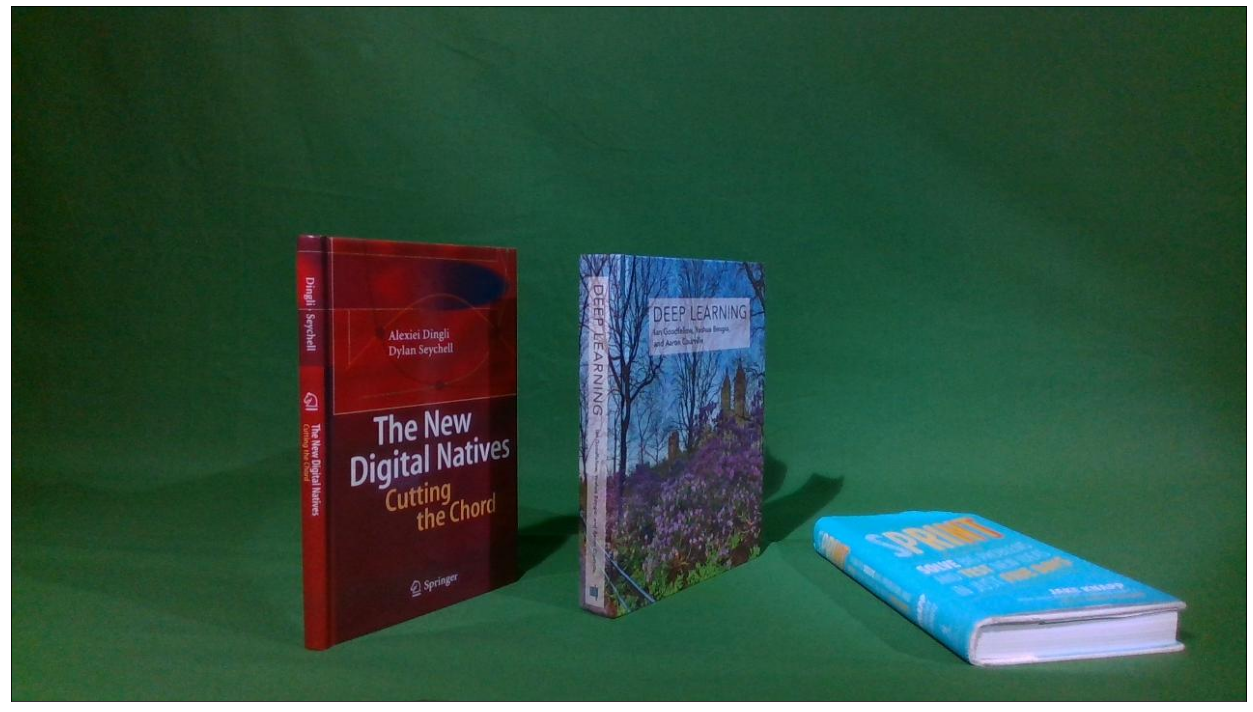

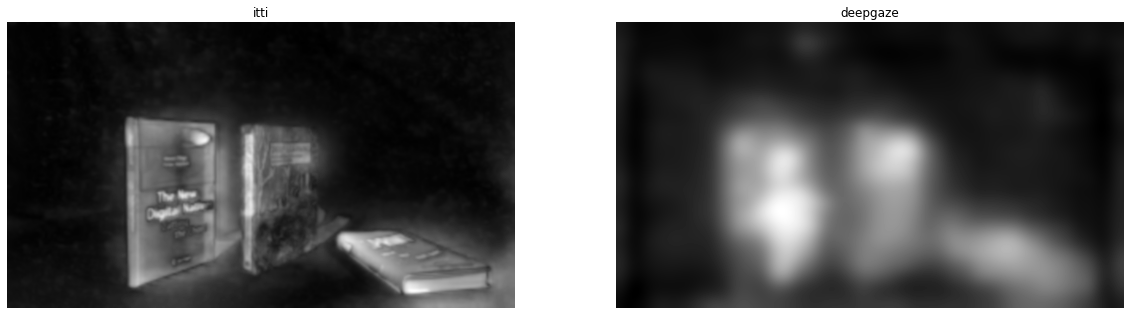

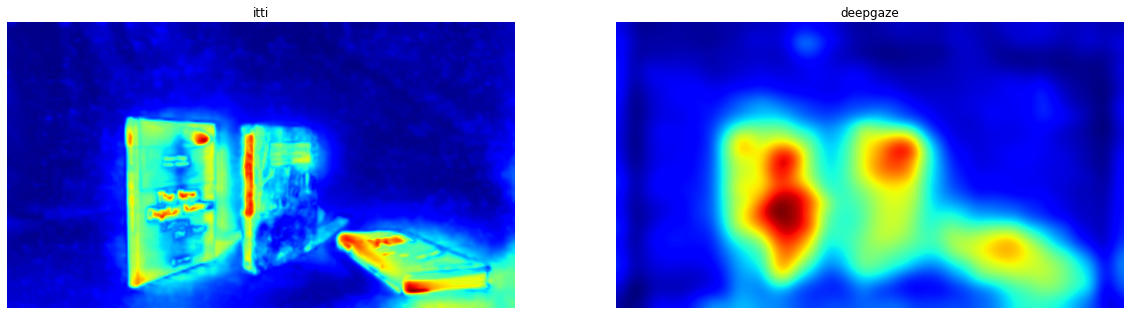

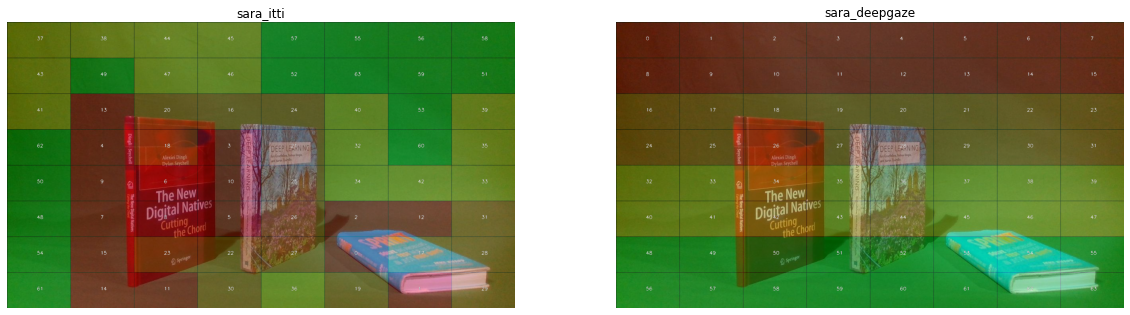

In [3]:
# Show original
plt.rcParams['figure.figsize'] = [20, 10]
plt.figure()
plt.imshow(im)
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()

plt.figure()
for i, (k, v) in enumerate(saliency_maps.items()):
    plt.subplot(1, 2, i+1)
    plt.imshow(v, cmap='gray')
    plt.title(k)
    plt.axis('off')

plt.figure()
for i, (k, v) in enumerate(saliency_maps.items()):
    plt.subplot(1, 2, i+1)
    plt.imshow(v, cmap='jet')
    plt.title(k)
    plt.axis('off')

plt.figure()
for i, (k, v) in enumerate(sara_heatmaps.items()):
    heatmap, _ = v
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)
    plt.subplot(1, 2, i+1)
    plt.imshow(heatmap, cmap='gray')
    plt.title(k)
    plt.axis('off')

In [4]:
# # Show original
# plt.figure()
# plt.imshow(im)
# plt.xticks([])
# plt.yticks([])

# plt.tight_layout()
# plt.show()


# # Show saliency maps
# plt.figure()
# plt.subplot(121)
# plt.imshow(sm_itti, cmap='gray')
# plt.xticks([])
# plt.yticks([])
# plt.subplot(122)
# plt.imshow(sm_dg, cmap='gray')
# plt.xticks([])
# plt.yticks([])

# plt.tight_layout()
# plt.show()


# # Show saliency maps overlayed on original
# plt.figure()
# plt.subplot(121)
# plt.imshow(im)
# plt.imshow(sm_itti, cmap='jet', alpha=0.5)
# plt.title('Itti')
# plt.xticks([])
# plt.yticks([])
# plt.subplot(122)
# plt.imshow(im)
# plt.imshow(sm_dg, cmap='jet', alpha=0.5)
# plt.title('DeepGaze IIE')
# plt.xticks([])
# plt.yticks([])
# plt.tight_layout()
# plt.show()